## Set to directory with python scripts

In [1]:
scripts_path = '/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/scripts/'

# Path to save figures
path_to_save = '/'.join(scripts_path.split('/')[:-2]) + '/'

# Path to save supplementary and figure data folders
save_path = '/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/'
%cd $scripts_path

/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/scripts


## Load modules

In [2]:
import re
import glob
import ast
import shap
import scipy.stats as st
from collections import Counter
import sklearn
from matplotlib import cm
import scipy
import itertools
from datetime import datetime
from seaborn import clustermap
from scipy.cluster.hierarchy import linkage
from sklearn.linear_model import LogisticRegression
import os
import time
import pickle as pkl

from helper import *
from dataLoader import *
from basic_data_methods_helper import *

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

## Load data

In [3]:
# set data_path to point to directory with data
data_path = save_path + "/Data/"

# Option to change filtering criteria
dl = dataLoader(path = data_path, pt_perc = {'metabs': .25, '16s': .1, 'scfa': 0, 'toxin':0}, meas_thresh = 
                {'metabs': 0, '16s': 10, 'scfa': 0, 'toxin':0}, 
                var_perc = {'metabs': 50, '16s': 5, 'scfa': 0, 'toxin':0}, pt_tmpts = 1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Calculate AUCs and feature selections for all results in given folder

In [6]:
# Set path to where predictive analysis results are 
path = path_to_save + '/PredictiveAnalysisResults/'
# path2 = '/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/'

if os.path.isfile(path + 'aucs.pkl'):
    with open(path + 'aucs.pkl', 'rb') as f:
        auc_all = pkl.load(f)
else:
    auc_all = {}
    
ss_all = {}
for method in os.listdir(path):
    in_path = path + method + '/'
#     if len(method.split('_'))==2:
#         continue
    if not os.path.isdir(in_path):
        continue
        

    final_res_dict = {}
    ss_dict = {}
    for folder in os.listdir(in_path):
#         if folder in auc_all[method].keys():
#             continue
        if not os.path.isdir(in_path  + folder):
            continue
        final_res_dict[folder] = {}
        sens = []
        spec = []
        for file in os.listdir(in_path + folder):
            if 'pkl' not in file:
                continue
            if file == '.DS_Store':
                continue
            try:
                with open(in_path + folder + '/' + file, 'rb') as f:
                        # temp is a dictionary with parameter keys 
                    temp = pkl.load(f)
            except:
                print('PICKLE ERROR')
                print(in_path + folder + '/' + file)
                break
            try:
                ix = int(file.split('_')[-1].split('.')[0])
            except:
                final_res_dict[folder] = temp

            final_res_dict[folder][ix] = temp
            
            if 'cox' not in method:
                if len(temp['outcomes']) != len(temp['probs']):
                    print('Error - Bad lengths!')

                    fpr, tpr, thresholds = sklearn.metrics.roc_curve(temp['outcomes'], temp['probs'])
                    ix = np.argmax([np.sqrt(t + (1-f)) for f, t in zip(fpr, tpr)])
                    sensitivity = tpr[ix]
                    specificity = fpr[ix]
                    spec.append(specificity)
                    sens.append(sensitivity)
        
        if folder not in ss_dict.keys():
            ss_dict[folder] = {}
        ss_dict[folder]['sensitivity'] = sens
        ss_dict[folder]['specificity'] = spec

    ss_all[method] = ss_dict
    if method not in auc_all.keys():
        auc_dict = get_auc_df(final_res_dict, in_path )
        auc_all[method] = auc_dict
        print('performance results in ' + in_path)
    
    for folder in os.listdir(in_path):
        if not os.path.isdir(in_path +  folder):
            continue
        if len(os.listdir(in_path + folder)) == 0:
            continue
        if 'coefs.csv' not in os.listdir(in_path + folder):
            get_coefs(in_path, folder)
            print('coefs in ' + in_path + folder)
    
with open(path + 'aucs.pkl', 'wb') as f:
    pkl.dump(auc_all, f)

performance results in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/scfa
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/scfa
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/demo
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/demo
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/16s
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/16s
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week1.0/metabs
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/

Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


performance results in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/scfa
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/scfa
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/16s
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/16s
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/metabs
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/metabs
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week0.0/metabs_16s_scfa_toxin_demo
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysis

coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/metabs
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/metabs_16s_scfa_toxin_demo
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/metabs_16s_scfa_toxin_demo
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/metabs_16s_scfa_demo
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/metabs_16s_scfa_demo
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/toxin
coefs in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/cox2_week0.0/toxin
performance results in /Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses//PredictiveAnalysisResults/RF_week1.0/
/Users/jend

In [7]:
ss_fin = {}
for key in ss_all.keys():
    ss_fin[key] = {}
    for dtype in ss_all[key].keys():
        ss_fin[key][dtype] = {}
        for ss in ['sensitivity','specificity']:
            
            ss_fin[key][dtype][ss] = {}
            ss_fin[key][dtype][ss]['data'] = ss_all[key][dtype][ss]
            ss_fin[key][dtype][ss]['median'] = np.median(ss_all[key][dtype][ss])
            if len(ss_all[key][dtype][ss]) > 0:
                ss_fin[key][dtype][ss]['95%'] = get_percentiles(ss_all[key][dtype][ss], 
                                                                       interval = 95, coef = False)
            else:
                ss_fin[key][dtype][ss]['95%'] = ()

Mean of empty slice.
invalid value encountered in double_scalars


# If results have already been analyzed, just load the AUC pickle file 

In [3]:
path = path_to_save + 'PredictiveAnalysisResults/'

with open(path + 'aucs.pkl', 'rb') as f:
    auc_all = pkl.load(f)

## Create supplemental table 4 with predictive analysis results

In [10]:
from string import ascii_uppercase
path_save = save_path + '/Supplemental Tables/'

out_dict = {}
data_dict = {'AUC': {}, 'sensitivity': {}, 'specificity':{}}
i=0
for key in auc_all.keys():
    print(key)
    keyl = key.split('_')
    if len(keyl)>2:
        continue
    for kk in auc_all[key].keys():
        if 'toxin' in kk:
            continue
        keyl.append(kk.replace('_','+'))
        temp = auc_all[key][kk].copy()
        sc = pd.DataFrame(temp['data'])
        temp_dat = np.empty(49)
        temp_dat[:] = np.nan
        temp_dat[np.arange(len(sc))] = sc.values.squeeze()
        temp.pop('MAD Interval')
        del temp['data']
        for kval, value in temp.items():
            temp[('AUC', kval)] = temp.pop(kval)
        data_dict['AUC'][tuple(keyl)] = temp_dat
            
        out_dict[tuple(keyl)] = temp
        keyl.pop(-1)
        i += 1
df_dat = pd.DataFrame(data_dict).T.sort_index().T
df = pd.DataFrame(out_dict).T
df = df.sort_index()
with pd.ExcelWriter(path_save + 'Table 4. Predictive Results.xlsx', mode = 'w') as writer:
    df.to_excel(writer, sheet_name = 'A. Results')
    
v = 'AUC'
df_dat = pd.DataFrame(data_dict[v]).T.sort_index().T
with pd.ExcelWriter(path_save + 'Table 4. Predictive Results.xlsx', mode = 'a') as writer:
    df_dat.to_excel(writer, sheet_name = 'B.' + v + ' data')
        
        

cox2_week1.0
RF_week0.0
LR_week0.0
cox2_week2.0
LR_week2.0
RF_week2.0
cox2_week0.0
RF_week1.0
LR_week1.0


In [11]:
from string import ascii_uppercase
path_save = save_path + '/Supplemental Tables/'

out_dict = {}
data_dict = {}
i=0
for key in auc_all.keys():
    keyl = key.split('_')
    if len(keyl)>2:
        continue
    for kk in auc_all[key].keys():
        if 'toxin' in kk:
            continue
        keyl.append(kk.replace('_','+'))
        temp = auc_all[key][kk].copy()
        sc = pd.DataFrame(temp['data'])
        temp_dat = np.empty(48)
        temp_dat[:] = np.nan
        temp_dat[np.arange(len(sc))] = sc.values.squeeze()
        data_dict[tuple(keyl)] = temp_dat
        del temp['data']
        out_dict[tuple(keyl)] = temp
        keyl.pop(-1)
        i += 1
df_dat = pd.DataFrame(data_dict).T.sort_index().T
df = pd.DataFrame(out_dict).T
df = df.sort_index()
with pd.ExcelWriter(path_save + 'Table 4. Predictive Results.xlsx', mode = 'w') as writer:
    df.to_excel(writer, sheet_name = 'A. Results')
    
    
with pd.ExcelWriter(path_save + 'Table 4. Predictive Results.xlsx', mode = 'a') as writer:
    df_dat.to_excel(writer, sheet_name = 'B. Data')

## Move & rename csvs

In [12]:
# Folder with predictive analysis results
res_path = 'PredictiveAnalysisResults/'
if not os.path.isdir(path_to_save + 'predictive_feature_tables'):
    os.mkdir(path_to_save + 'predictive_feature_tables')
for method in os.listdir(path_to_save + res_path):
    if 'DS' in method:
        continue
    in_path = path_to_save + res_path + method + '/'

    if not os.path.isdir(in_path):
        continue
    auc_dict = auc_all[method]
    coef_res_dict = {}
    for folder in os.listdir(in_path):
        print(in_path + folder)
        if not os.path.isdir(in_path +  folder):
            continue
        csv_files = glob.glob(os.path.join(in_path + folder, '*.csv'))
        if len(csv_files)>0:
            for csv_file in csv_files:
                if len(method.split('_')) == 5:
                    nm = 'joint'
                else:
                    nm = method.split('_')[1]
                new_dir = path_to_save + 'predictive_feature_tables/' + folder + '_' + nm+ '/'
#                 print(new_dir)
                if not os.path.isdir(new_dir):
                    os.mkdir(new_dir)
                os.rename(csv_file, new_dir + method.split('_')[0] + '-' + 
                          str(np.round(auc_dict[folder]['Median'], 3)).replace('.','')[:4] + '.csv')

/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/scfa
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/demo
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/auc_2021-11-05.csv
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/16s
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/.DS_Store
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/scfa.txt
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/auc_2021-11-15.csv
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/16s.txt
/Users/jendawk/Dropbox (MIT)/C Diff Recurrence Paper/Analyses/PredictiveAnalysisResults/cox2_week1.0/metabs
/User

## Save feature selections/coefficients/importances to Supplemental Table 5

In [13]:
from string import ascii_uppercase
path_save = save_path + 'Supplemental Tables/'
taxa_labels = pd.read_csv(path_to_save + 'scripts/inputs/' + 'taxa_labels.csv', index_col = [0])

ii = 5
idict = {}
tname = {}
df_out = {}
for folder in os.listdir(path_to_save + 'predictive_feature_tables/'):
    if 'toxin' in folder:
        continue
    fname = '-'.join(folder.split('_')[:-1])
    if folder == '.DS_Store':
        continue
    if 'slope' in folder:
        continue
    if fname not in tname.keys():
        ii += 1
        tname[fname]  = ii
#     print(tname)
    if fname not in df_out.keys():
        df_out[fname] = {}
    table_name = path_save + 'Table ' + str(tname[fname]) + ' - ' + fname.capitalize() + ' Predictive Analysis.xlsx'
    timepoint = folder.split('_')[-1].capitalize()
    for file in os.listdir(path_to_save + 'predictive_feature_tables/' + folder):
        if file == '.DS_Store':
            continue
        sigfeats = pd.read_csv(path_to_save + 'predictive_feature_tables/' + folder + '/' + file, index_col = 0)
        
        label = file.split('.')[0] + ' ' + timepoint
        
        sigfeats = sigfeats.loc[sigfeats.iloc[:,0]!=1, :]
        
        
        if '16s' in fname:
            seqs = list(set(sigfeats.index.values).intersection(taxa_labels['taxa_rdp'].index.values))
            sigfeats['Taxonomy-RDP'] = np.zeros(len(sigfeats.index.values))
#             sequences = sigfeats.index.values
            sigfeats['Taxonomy-RDP'].loc[seqs] = taxa_labels['taxa_rdp'].loc[seqs]
#             sigfeats['Taxonomy-Silva'] = taxa_labels['taxa_silva'].loc[sigfeats.index.values]
            sigfeats['Labels'] = sigfeats.index.values
            sigfeats['Labels'].loc[seqs] = taxa_labels['labels'].loc[seqs]
            sigfeats = sigfeats.set_index('Labels')
#             sigfeats['Sequences'] = sequences
            
        for ix in sigfeats.index.values:
            df_out[fname][(label.split(' ')[1], label.split(' ')[0], ix)] = sigfeats.loc[ix].to_dict()
            
for f in df_out.keys():
    df = pd.DataFrame(df_out[f]).T.sort_index()
    if os.path.exists(path_save + 'Table 5. Predictive Features.xlsx'):
        with pd.ExcelWriter(path_save + 'Table 5. Predictive Features.xlsx',mode ='a') as writer:
            df.to_excel(writer, sheet_name = f)
            
    else:
        with pd.ExcelWriter(path_save + 'Table 5. Predictive Features.xlsx') as writer:
            df.to_excel(writer, sheet_name = f)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [14]:
from string import ascii_uppercase
path_save = save_path + '/Data/Predictive Analyses/'
if not os.path.isdir(path_save):
    os.path.mkdir(path_save)
taxa_labels = pd.read_csv(path_to_save + 'scripts/inputs/' + 'taxa_labels.csv', index_col = [0])

ii = 5
idict = {}
tname = {}
df_out = {}
for folder in os.listdir(path_to_save + 'predictive_feature_tables/'):
    fname = '-'.join(folder.split('_')[:-1])
    df_out[fname] = {}
    if folder == '.DS_Store':
        continue
    if fname not in tname.keys():
        ii += 1
        tname[fname]  = ii
#     print(tname)
    table_name = path_save + 'Table ' + str(tname[fname]) + ' - ' + fname.capitalize() + ' Predictive Analysis.xlsx'
    timepoint = folder.split('_')[-1].capitalize()
    for file in os.listdir(path_to_save + 'predictive_feature_tables/' + folder):
        if file == '.DS_Store':
            continue
        sigfeats = pd.read_csv(path_to_save + 'predictive_feature_tables/' + folder + '/' + file, index_col = 0)
        
        label = file.split('.')[0] + ' ' + timepoint
        
        if '16s' in fname:
            seqs = list(set(sigfeats.index.values).intersection(taxa_labels['taxa_rdp'].index.values))
            sigfeats['Taxonomy-RDP'] = np.zeros(len(sigfeats.index.values))
#             sequences = sigfeats.index.values
            sigfeats['Taxonomy-RDP'].loc[seqs] = taxa_labels['taxa_rdp'].loc[seqs]
#             sigfeats['Taxonomy-Silva'] = taxa_labels['taxa_silva'].loc[sigfeats.index.values]
            sigfeats['Labels'] = sigfeats.index.values
            sigfeats['Labels'].loc[seqs] = taxa_labels['labels'].loc[seqs]
            sigfeats = sigfeats.set_index('Labels')
#             sigfeats['Sequences'] = sequences
            
        for ix in sigfeats.index.values:
            df_out[fname][(label, ix)] = sigfeats.loc[ix].to_dict()
        
        if table_name not in idict and os.path.exists(table_name):
            os.remove(table_name)
        if os.path.exists(table_name):
            idict[table_name] += 1
            nm = ascii_uppercase[idict[table_name]]
            with pd.ExcelWriter(table_name, mode = 'a') as writer:
                sigfeats.to_excel(writer, sheet_name = nm + '.' + label)
        else:
            idict[table_name] = 0
            nm = ascii_uppercase[idict[table_name]]
            with pd.ExcelWriter(table_name) as writer:
                sigfeats.to_excel(writer, sheet_name = nm + '.' + label)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Plot figure 4

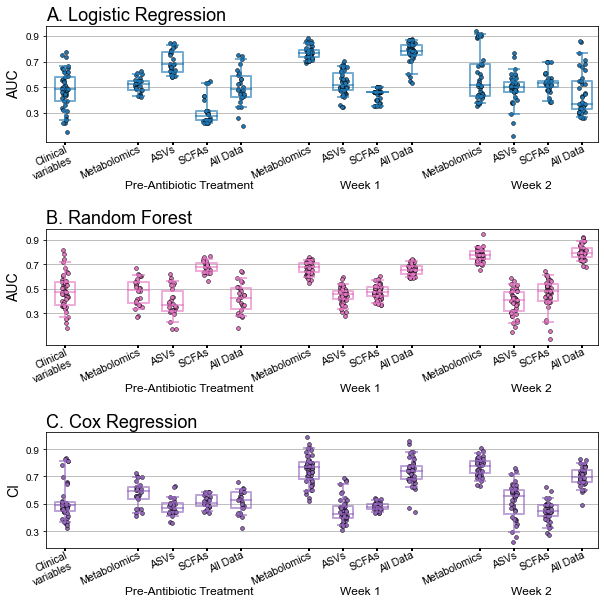

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

auc_split = {}
for k, v in auc_all.items():
    method, week = k.split('_week')
    if week not in auc_split.keys():
        auc_split[week] = {}
    for kk, vv in v.items():
        if len(kk.split('_'))==4:
            kk = 'joint'
        if kk not in auc_split[week].keys():
            auc_split[week][kk] = {}
        auc_split[week][kk][method] = vv

fig, ax = plt.subplots(3,1,figsize = (8.5,8.5))

cmap = plt.get_cmap('tab20')
# fig, ax = plt.subplots(figsize = (14,5))
i=0
p={}
k = 0
j = 0
colors = {'LR':'tab:blue','RF':'tab:pink','cox2':'tab:purple'}
out_colors = {}
xmaj = []
xstart = -2
xmin = []
lines = []
for i,model in enumerate(['LR','RF','cox2']):
    xminor = []
    xmajor = []
    xloc = -2.15
    dat = auc_split['1.0']['demo'][model]['data']
    xminor.append(xloc)
    p = ax[i].boxplot(dat, positions = [xloc], widths = 0.6,whis=[5, 95],showfliers=False)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(p[element], color=colors[model], linewidth = 2, alpha = 0.6)

    ax[i].scatter([xloc]*len(dat) + np.random.uniform(-1,1, size = len(dat))*.1, dat, 
                  marker = 'o', color = colors[model], s = 15, alpha = 1, edgecolors = 'black',linewidths = 0.5)
    for week in ['0.0','1.0','2.0']:
        for k, dattype in enumerate(['metabs','16s','scfa','joint']):
            xloc = float(week)*4 + k + float(week)
            dat = auc_split[week][dattype][model]['data']
            p = ax[i].boxplot(dat, positions = [xloc], widths = 0.6,whis=[5, 95],showfliers=False)
            for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
                plt.setp(p[element], color=colors[model], linewidth = 2, alpha = 0.6
#                          , zorder = -1
                        )
                
            ax[i].scatter([xloc]*len(dat) + np.random.uniform(-1,1, size = len(dat))*.1, dat, 
                          marker = 'o', color = colors[model], s = 15, alpha = 1, 
                          edgecolors = 'black',linewidths = 0.5)
            
            xminor.append(xloc)
        xmajor.append(float(week)*4 + float(week) + 1.5)
        
    ax[i].set_xlim(left = -2.70, right = xminor[-1] + 0.45)
    ax[i].set_yticks([0.3,0.5,0.7,0.9])
    ax[i].set_yticklabels([0.3,0.5,0.7,0.9],fontsize = 10)
    if model != 'cox2':
        ax[i].set_ylabel('AUC', fontsize = 14)
    else:
        ax[i].set_ylabel('CI', fontsize = 14)

    ax[i].set_xticks(xmajor)
    ax[i].set_xticklabels(['\n\n\nPre-Antibiotic Treatment', '\n\n\nWeek 1', '\n\n\nWeek 2'], 
                          fontsize = 12)
    #                     '\n\nChange from \nweek 1 to 2'], fontsize = 16)
    ax[i].set_xticks(xminor, minor = True)

    ax[i].set_xticklabels(['Clinical\nvariables','Metabolomics', 'ASVs', 'SCFAs', 'All Data','Metabolomics','ASVs', 
                    'SCFAs', 'All Data','Metabolomics', 'ASVs', 'SCFAs', 'All Data'
    #                      ,'Metabolites','ASVs', 'SCFAs', 'Culture/\nToxin'
                    ], minor = True, fontsize = 10.5, 
                    rotation = 25, rotation_mode = 'anchor', ha = 'right')
    
    ax[i].grid(axis='y', zorder = -1)
    ax[i].set_axisbelow(True)
    ax[i].tick_params(axis=u'x', which=u'major',length=0)
    ax[i].tick_params(axis=u'x', which=u'minor',length=3, width = 2)
    ax[i].tick_params(axis="x",direction="out", pad=-1, which = 'minor')

# ax[0].set_title('Logistic Regression')
# ax[1].set_title('Random Forest')
# ax[2].set_title('Survival Analysis')
    
#     lines.append(ax[i].scatter([],[],marker = 'o', s = 40, color = colors[model], edgecolors = 'black',
#                               linewidths = 1))
    
xy_e = get_panal_locs(ax[0])
ax[0].annotate('A. Logistic Regression', xy = (xy_e[0], xy_e[1]-0.05), annotation_clip = False, fontsize =18)

xy_e = get_panal_locs(ax[1])
ax[1].annotate('B. Random Forest', xy = (xy_e[0], xy_e[1]-0.05), annotation_clip = False, fontsize = 18)

xy_e = get_panal_locs(ax[2])
ax[2].annotate('C. Cox Regression', xy = (xy_e[0], xy_e[1]-0.05), annotation_clip = False, fontsize = 18)

# lgd = fig.legend(lines, ['Logistic Regression','Random Forest','Survival Analysis'], bbox_to_anchor=(.985, 1.05),
#           prop={'size': 13})
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.75)
fig.savefig(path_to_save + '/output_figures/Fig4.pdf',
            bbox_inches='tight')